In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data.csv')
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [10]:
for col in strings:
    df[col] = df[col].astype(str).str.lower().str.replace(" ", "_", regex=False)

### Exploratory data analysis

In [11]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
11

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
72

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

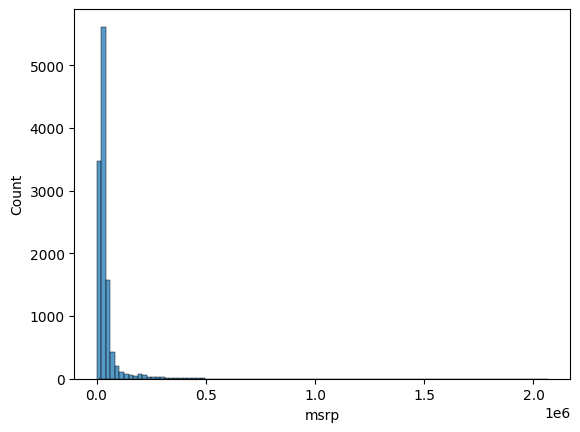

In [13]:
sns.histplot(df.msrp, bins=100) #1e6 = 1 million

<Axes: xlabel='msrp', ylabel='Count'>

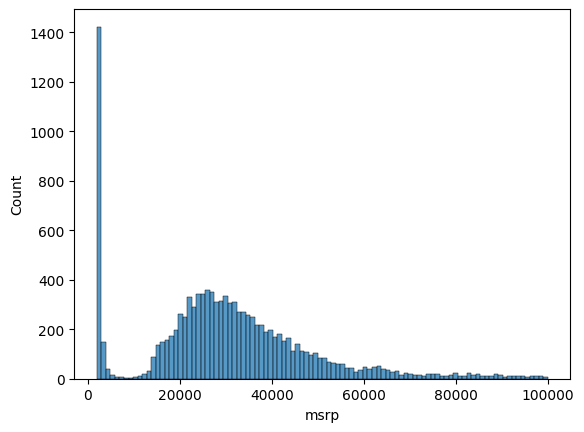

In [14]:
sns.histplot(df.msrp[df.msrp < 100000], bins=100) #1e6 = 1 million

In [15]:
np.log1p([0])

array([0.])

In [16]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

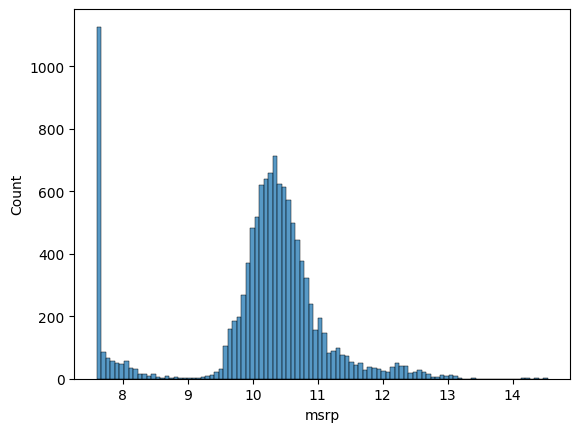

In [17]:
sns.histplot(price_logs, bins=100) #looks approximately like normal distribution

In [18]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_fuel_type      0
engine_hp            69
engine_cylinders     30
transmission_type     0
driven_wheels         0
number_of_doors       6
market_category       0
vehicle_size          0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
msrp                  0
dtype: int64

### Setting up the validation framework

In [19]:
n = len(df)
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

In [20]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [21]:
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [22]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:(n_val+n_test)]
df_train = df.iloc[(n_val+n_test) :]

In [23]:
len(df_val), len(df_test), len(df_train)

(2382, 2382, 7150)

In [24]:
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)

In [25]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,37800
1,ford,flex,2017,premium_unleaded_(recommended),365.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,21,15,5657,43030
2,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",large,wagon,22,16,5657,40180
3,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,32730
4,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,38230


In [26]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

#np.expm1 

del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

### Training a lr model

In [58]:
#alpha is also called the bias term
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_sol = XTX_inv.dot(X.T).dot(y)
    return w_sol[0], w_sol[1:]

In [59]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [60]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [61]:
X_train = df_train[base].values
train_linear_regression(X_train, y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

In [62]:
df_train[base].isnull().sum()

engine_hp           56
engine_cylinders    24
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [63]:
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)

In [64]:
y_pred = X_train.dot(w) + w0

<Axes: ylabel='Count'>

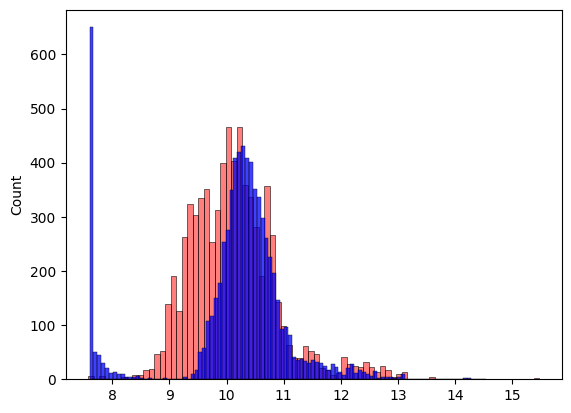

In [65]:
sns.histplot(y_pred, alpha = 0.5, color = 'red') #alpha is transparency 
sns.histplot(y_train, color = 'blue')

 ### RMSE root mean square error

In [66]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [67]:
rmse(y_train, y_pred)

np.float64(0.7063387650493995)

### Validation the model

In [69]:
X_val = df_val[base].fillna(0).values
y_val_pred = X_val.dot(w) + w0
rmse(y_val_pred, y_val)

np.float64(0.8602674179621871)

In [70]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

### Simple feature engineering

In [71]:
def prepare(df_):
    df = df_.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    return df_num.values

In [72]:
X_train = prepare(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare(df_val)
y_val_pred = X_val.dot(w) + w0

rmse(y_val, y_val_pred)

np.float64(0.5464063451776495)

### Categorical variables

In [127]:
def prepare(df_):
    df = df_.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    for v in [2, 3, 4]:
        col_name = 'num_doors_%s' % v
        df[col_name] = (df.number_of_doors == v).astype(int)
        features.append(col_name)
    
    categories = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
                 'market_category', 'vehicle_size', 'vehicle_style']
  
    categories_dict = {}
    
    for i in categories:
        categories_dict[i] = list(df_train[i].value_counts().head().index)
    for k, values in categories_dict.items():
        for v in values:
            col_name = '%s_%s' % (k, v)
            df[col_name] = (df[k] == v).astype(int)
            features.append(col_name)        
            
    df_num = df[features]
    df_num = df_num.fillna(0)
    return df_num.values

In [108]:
prepare(df_train)

array([[287.,   6.,  23., ...,   0.,   0.,   0.],
       [365.,   6.,  21., ...,   0.,   0.,   0.],
       [287.,   6.,  22., ...,   0.,   0.,   0.],
       ...,
       [300.,   6.,  23., ...,   0.,   1.,   0.],
       [300.,   6.,  23., ...,   0.,   1.,   0.],
       [221.,   6.,  26., ...,   0.,   0.,   0.]], shape=(7150, 41))

In [109]:
X_train = prepare(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare(df_val)
y_val_pred = X_val.dot(w) + w0

rmse(y_val, y_val_pred)

np.float64(5.894595805019989)

In [114]:
#regularisation problem
w0

np.float64(556569116069814.94)

In [113]:
#alpha is also called the bias term
def train_linear_regression_reg(X,y, reg_num=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + np.eye(XTX.shape[0])*reg_num
    XTX_inv = np.linalg.inv(XTX)
    w_sol = XTX_inv.dot(X.T).dot(y)
    return w_sol[0], w_sol[1:]

In [117]:
X_train = prepare(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, reg_num=0.01)

X_val = prepare(df_val)
y_val_pred = X_val.dot(w) + w0

rmse(y_val, y_val_pred)

np.float64(0.5646515754067534)

### Tuning the model

In [130]:
for r in [0.0, 0.0001, 0.001, 0.01, 0.1, 1, 10]:

    X_train = prepare(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, reg_num=r)
    
    X_val = prepare(df_val)
    y_val_pred = X_val.dot(w) + w0
    
    print(r, w0, rmse(y_val, y_val_pred))

0.0 556569116069814.94 5.725685053406059
0.0001 6.727568679575698 0.5484634615805986
0.001 6.739213585229518 0.5484407824786297
0.01 6.725475497737362 0.5482158139779444
0.1 6.5985243156351086 0.546130976510912
1 5.842868452010707 0.534178234783991
10 4.2137422801551985 0.5453837643423883


In [131]:
r =1 
X_train = prepare(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, reg_num=r)

X_val = prepare(df_val)
y_val_pred = X_val.dot(w) + w0

print(r, w0, rmse(y_val, y_val_pred))

1 5.842868452010707 0.534178234783991


### Using the model

In [132]:
df_full_train = pd.concat([df_train, df_val])
df_full_train.reset_index(drop = True, inplace = True)

In [133]:
y_full_train = np.concat([y_train, y_val])

In [134]:
r =1 
X_full_train = prepare(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, reg_num=r)

X_test = prepare(df_test)
y_test_pred = X_test.dot(w) + w0

print(r, w0, rmse(y_test, y_test_pred))

1 5.686252727472526 0.48369156282898745


In [135]:
car = df_test.iloc[20].to_dict()
car

{'make': 'volkswagen',
 'model': 'cc',
 'year': 2015,
 'engine_fuel_type': 'premium_unleaded_(recommended)',
 'engine_hp': 200.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automated_manual',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'sedan',
 'highway_mpg': 31,
 'city_mpg': 22,
 'popularity': 873}

In [136]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volkswagen,cc,2015,premium_unleaded_(recommended),200.0,4.0,automated_manual,front_wheel_drive,4.0,performance,midsize,sedan,31,22,873


In [137]:
X_small = prepare(df_small)
y_pred = w0 + X_small.dot(w)
np.expm1(y_pred[0])

np.float64(33073.42924777992)

In [138]:
np.expm1(y_test[20])

np.float64(34095.00000000001)